In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import gaussian_kde
from scipy.stats import binned_statistic

# Num Signals v/s Efficiency Analysis
   For this set of 1500 simulations, I chose a chirp mass of 1.15 and a frequency range from 
4-7Hz, the total number of TFFTs for each simulation is 32 and the durraction is 9853. Each signnal is measures with three differnt aplituded 1e-22,1e-23 and 1e-24. To get all of these simulations to run it took approximatly 15 hrs running on my local device. 

In [202]:
#I need to open and load 30 files (but I dont want to do that one by one)
#Lets try to used glob to get all of the files

path="/Users/lianysfeliciano/Nikhef_REU/CSVs" #path to CSV folder

files=glob.glob(path+'/*.csv') 
#using glob to search for all files ending with.csv and grouping them

ls=[] #making empty list to append dfs to

for f in files: #loop to open each df
    temp_df=pd.read_csv(f) 
    ls.append(temp_df) #adding files to list 
    
#merging all df into one big one
df=pd.concat(ls,axis=0) 
print("Shape:",df.shape)
df.head()

Shape: (1500, 31)


,N,Retireved_N,TFFT,dur,Cr,cm,minf,maxf,h0,distaway_1,...,distaway_6,distaway_7,distaway_8,distaway_9,f0_6,f0_7,f0_8,f0_9,distaway_10,f0_10
0,4,1,32,9853,1.68625,1.15,4,7,1.000000e-24,4.470225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,3,32,9853,1.34900,1.15,4,7,1.000000e-24,1.827960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,1,32,9853,1.68625,1.15,4,7,1.000000e-24,1.235559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,32,9853,6.74500,1.15,4,7,1.000000e-24,4.194978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,32,9853,2.02350,1.15,4,7,1.000000e-24,5.573912,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
#picking our df with same nuber of insjected signas to do analysis 
#I cannot simply index becasue they are mixed up in the big dataset
Num=[1,2,3,4,5,6,7,8,9,10]
N=np.array(df["N"])
for n in Num:
    ls1=[]
    ls2=[]
    ls3=[]
    ls4=[]
    ls5=[]
    ls6=[]
    ls7=[]
    ls8=[]
    ls9=[]
    ls10=[]
    for i in range(len(N)):
        if N[i]==1:
            ls1.append(df.iloc[i])
        elif N[i]==2:
            ls2.append(df.iloc[i])
        elif N[i]==3:
            ls3.append(df.iloc[i])
        elif N[i]==4:
            ls4.append(df.iloc[i])
        elif N[i]==5:
            ls5.append(df.iloc[i])
        elif N[i]==6:
            ls6.append(df.iloc[i])
        elif N[i]==7:
            ls7.append(df.iloc[i])
        elif N[i]==8:
            ls8.append(df.iloc[i])
        elif N[i]==9:
            ls9.append(df.iloc[i])
        elif N[i]==10:
            ls10.append(df.iloc[i])
    
    df1=pd.DataFrame(ls1)
    df2=pd.DataFrame(ls2)
    df3=pd.DataFrame(ls3)
    df4=pd.DataFrame(ls4)
    df5=pd.DataFrame(ls5)
    df6=pd.DataFrame(ls6)
    df7=pd.DataFrame(ls7)
    df8=pd.DataFrame(ls8)
    df9=pd.DataFrame(ls9)
    df10=pd.DataFrame(ls10)        

In [4]:
#Now we have a df for each signal injection each containing the three different amplitudes
#I can index each to calculate the efficiency
A23=df1.iloc[0:49,:]
A22=df1.iloc[50:99,:]
A24=df1.iloc[100:150,:]
print(A23)

      N  Retireved_N  TFFT     dur        Cr    cm  minf  maxf            h0  \
0   1.0          1.0  32.0  9853.0  2.473167  1.15   4.0   7.0  1.000000e-23   
1   1.0          1.0  32.0  9853.0  2.248333  1.15   4.0   7.0  1.000000e-23   
2   1.0          1.0  32.0  9853.0  2.698000  1.15   4.0   7.0  1.000000e-23   
3   1.0          1.0  32.0  9853.0  3.541125  1.15   4.0   7.0  1.000000e-23   
4   1.0          1.0  32.0  9853.0  5.058750  1.15   4.0   7.0  1.000000e-23   
5   1.0          0.0  32.0  9853.0  2.473167  1.15   4.0   7.0  1.000000e-23   
6   1.0          1.0  32.0  9853.0  3.822167  1.15   4.0   7.0  1.000000e-23   
7   1.0          1.0  32.0  9853.0  4.047000  1.15   4.0   7.0  1.000000e-23   
8   1.0          1.0  32.0  9853.0  2.698000  1.15   4.0   7.0  1.000000e-23   
9   1.0          1.0  32.0  9853.0  5.620833  1.15   4.0   7.0  1.000000e-23   
10  1.0          1.0  32.0  9853.0  4.384250  1.15   4.0   7.0  1.000000e-23   
11  1.0          0.0  32.0  9853.0  2.24

In [5]:
#doing it for 1 df and to reated func w. same template
N=np.array(df1['N'])
Retireved_N=np.array(df1['Retireved_N'])
h0=np.array(df1["h0"])
a=0
b=0
c=0

for i in range(len(N)):
    if N[i]==Retireved_N[i] and h0[i]==1e-22:
        a+=1

    if N[i]==Retireved_N[i] and h0[i]==1e-23:
        b+=1


    if N[i]==Retireved_N[i]and h0[i]==1e-24:
        c+=1

    E1=a/50
    E2=b/50
    E3=c/50 

print(E1,E2,E3)

#Correct Calculations^

0.88 0.0 0.0


After some test, I noticed that all of the df arent organized the same way sometimes -22 is first and other tiems -24 is first. This means a condition needs to be added to ensure
e-22,e-23 and e-24 are grouped properly.

In [39]:
def Efficiency(N,Retireved_N,h0):
    """
    Enter the number of signals, retreived signals and amplitude 
    columns of the df you desier to get the efficiency for each different amplitude
    """
    
    a=0
    b=0
    c=0
    
    for i in range(len(N)):
        if N[i]==Retireved_N[i] and h0[i]==1.0e-22:
            a+=1
        if N[i]==Retireved_N[i] and h0[i]==1.0e-23:
            b+=1
        if N[i]==Retireved_N[i]and h0[i]==1.0e-24:
            c+=1
    
    E1=a/50
    E2=b/50
    E3=c/50

    return E1,E2,E3

In [13]:
N1=np.array(df1["N"])
R1=np.array(df1["Retireved_N"])
H1=np.array(df1['h0'])

E1,E2,E3=Efficiency(N1,R1,H1)
print(E1,E2,E3)

0.88 0.0 0.0


### Why is it computing 0? Lets try with just 1 random file

In [14]:
tdf=pd.read_csv('~/Nikhef_REU/CSVs/df_5Sig_Amp:1e-23.csv')
#^ chose a file w/ 5 innjected signnals and with an amplitude of 1e-23

N=np.array(tdf["N"])
R=np.array(tdf["Retireved_N"])

a=0
b=0
c=0
d=0
e=0
f=0

for i in range(len(N)):
    if R[i]==5: #counting the number of times the 5 of 5 signnals are retrieved 
        print(i)
        a+=1
    if R[i]==4:#counting the number of time 4 signals are retrieved of the 5
        b+=1
        
    if R[i]==3:#counting the number of time 3 signals are retreived of the 5
        c+=1
        
    if R[i]==2: #counting the nnumber of time 2 signals are retrieved of the 5
        d+=1
        
    if R[i]==1:#counting the number of time 1 signal is retrieved out of 5
        e+=1
    if R[i]==0:
        f+=1
        
E=a/len(N)
E2=b/len(N)
E3=c/len(N)
E4=d/len(N)
E5=e/len(N)
E6=f/len(N)

print(E,E2,E3,E4,E5,E6)
print(E+E2+E3+E4+E5+E6) #making sure all the precentages add to 1

0.0 0.22 0.3 0.4 0.08 0.0
1.0


It appears there are no instances where all 5 signlas are reteived in which this occures thats why it's zero

## Calcualting Efficiency for Earch df

I was origionnally going to do this also in a loop but, becasue the df is a complex strucutre it takes extra work to get a fuction to let it pass through. Instead I just did it indivisually

In [41]:
E=[]
E2=[]
E3=[]

TypeError: Efficiency() missing 2 required positional arguments: 'Retireved_N' and 'h0'

## Graphing Results 

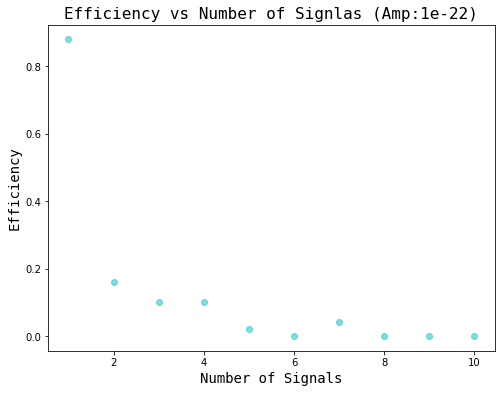

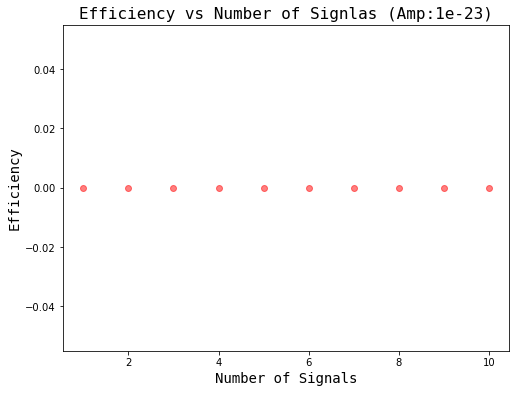

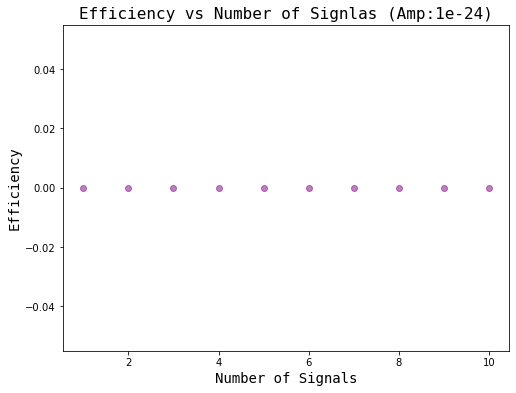

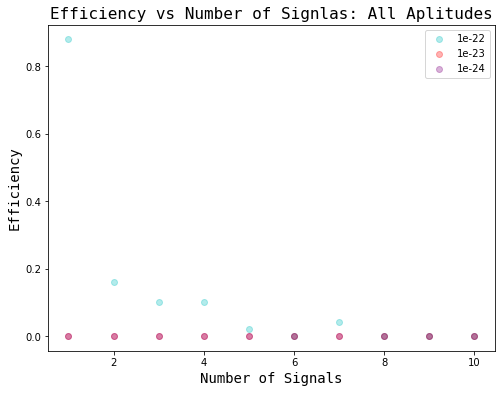

In [26]:
N=[1,2,3,4,5,6,7,8,9,10]

plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E,alpha=.5,color="c")
plt.title('Efficiency vs Number of Signlas (Amp:1e-22)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)


plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E2,alpha=.5,color="r")
plt.title('Efficiency vs Number of Signlas (Amp:1e-23)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)

plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E3,alpha=.5,color="purple")
plt.title('Efficiency vs Number of Signlas (Amp:1e-24)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)

plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E,alpha=.3,color="c",label='1e-22')
plt.scatter(N,E2,alpha=.3,color="r",label='1e-23')
plt.scatter(N,E3,alpha=.3,color="purple",label='1e-24')
plt.title('Efficiency vs Number of Signlas: All Aplitudes',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.legend(loc='upper right')

## Analysis
From these results I can see two things, either the chirp mass I chose was too small to detect or the frequency band was very low making ditection dificult. Additionally, I'd like to note that the amplitude 1e-22 was most receptive to returning signals. Perhaps next time larger amplituded need to be added or the chirp mass needs to be increased.

### Further Studies
I will now look into why the efficiency is so low. 

First by making a histogram of the distances

Then by calcualting the efficiency of 1/2 

Lastly by looking at some hough maps and seeing if the signals are there visually


In [27]:
df1
#that's strange why are there no disaway values for the first dataframe

,N,Retireved_N,TFFT,dur,Cr,cm,minf,maxf,h0,distaway_1,...,distaway_6,distaway_7,distaway_8,distaway_9,f0_6,f0_7,f0_8,f0_9,distaway_10,f0_10
0,1.0,1.0,32.0,9853.0,2.473167,1.15,4.0,7.0,1.000000e-23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,32.0,9853.0,2.248333,1.15,4.0,7.0,1.000000e-23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,32.0,9853.0,2.698000,1.15,4.0,7.0,1.000000e-23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,32.0,9853.0,3.541125,1.15,4.0,7.0,1.000000e-23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,32.0,9853.0,5.058750,1.15,4.0,7.0,1.000000e-23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,1.0,0.0,32.0,9853.0,2.023500,1.15,4.0,7.0,1.000000e-24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,1.0,1.0,32.0,9853.0,1.349000,1.15,4.0,7.0,1.000000e-24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,1.0,1.0,32.0,9853.0,1.124167,1.15,4.0,7.0,1.000000e-24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,1.0,0.0,32.0,9853.0,2.922833,1.15,4.0,7.0,1.000000e-24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


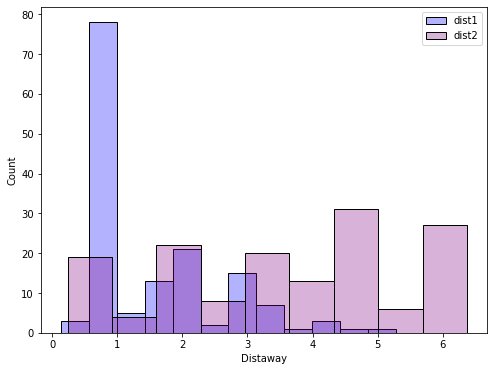

In [28]:
#histogram of distances for 2 signal injection
dist1=df2['distaway_1'] 
dist2=df2['distaway_2']


plt.figure(facecolor='w',figsize=(8,6))
sns.histplot(dist1,alpha=.3,label='dist1',color='blue')
sns.histplot(dist2,alpha=.3,label='dist2',color='purple')
plt.xlabel("Distaway")
plt.legend()

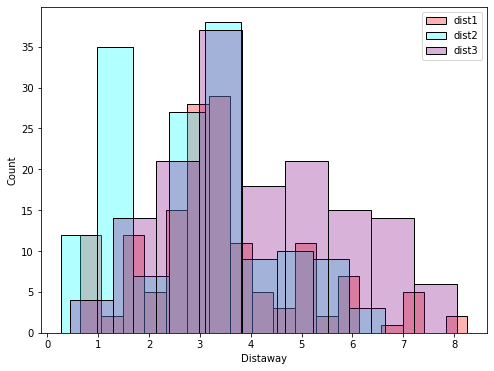

In [29]:
##histogram of distances for 3 signal injection
dist1=df3['distaway_1'] 
dist2=df3['distaway_2']
dist3=df3['distaway_3']


plt.figure(facecolor='w',figsize=(8,6))
sns.histplot(dist1,alpha=.3,label='dist1',color='red')
sns.histplot(dist2,alpha=.3,label='dist2',color='cyan')
sns.histplot(dist3,alpha=.3,label='dist3',color='purple')
plt.xlabel("Distaway")
plt.legend()

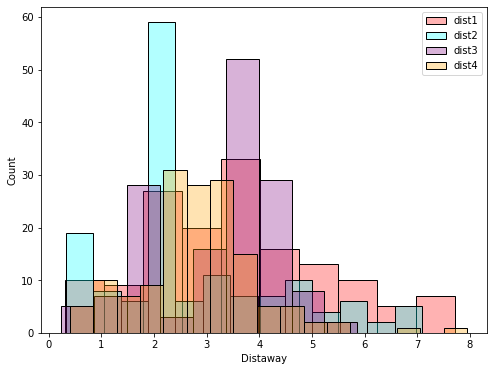

In [30]:
##histogram of distances for 4 signal injection
dist1=df4['distaway_1'] 
dist2=df4['distaway_2']
dist3=df4['distaway_3']
dist4=df4['distaway_4']

plt.figure(facecolor='w',figsize=(8,6))
sns.histplot(dist1,alpha=.3,label='dist1',color='red')
sns.histplot(dist2,alpha=.3,label='dist2',color='cyan')
sns.histplot(dist3,alpha=.3,label='dist3',color='purple')
sns.histplot(dist4,alpha=.3,label='dist4',color='orange')
plt.xlabel("Distaway")
plt.legend()

In [31]:
#calculatingn effieicney of exactly 1 rectrived out of 2 injections
def Efficiency1of2(Retireved_N,h0):   
    a=0
    b=0
    c=0
    
    for i in range(len(N)):
        if Retireved_N[i]==1 and h0[i]==1.0e-22:
            a+=1
        if Retireved_N[i]==1 and h0[i]==1.0e-23:
            b+=1
        if Retireved_N[i]==1 and h0[i]==1.0e-24:
            c+=1
    
    E1=a/50
    E2=b/50
    E3=c/50

    return E1,E2,E3

In [165]:
#effiency of 1 or 2 signals retreived out of 2 injections
def Efficiency1or2(Retireved_N,h0):
    
    a=0
    b=0
    c=0
    
    for i in range(len(N)):
        if Retireved_N[i]>=1 and h0[i]==1.0e-22:
            a=a+1
        
        if Retireved_N[i]>=1 and h0[i]==1.0e-23:
            b=b+1
        
        if Retireved_N[i]>=1 and h0[i]==1.0e-24:
            c=c+1
    
    E1=a/50
    E2=b/50
    E3=c/50

    return E1,E2,E3

In [166]:
#calculatingn effiency of 1 sigal
N=np.array(df2['N'])
Retireved_N=np.array(df2['Retireved_N'])
h0=np.array(df2['h0'])
E1,E2,E3=Efficiency1of2(Retireved_N,h0)

print('Effientcy of exacly 1 signal recovered out of 2 injected signals')
print("E 1e-22: ",E1)
print("E 1e-23: ",E2)
print("E 1e-24: ",E3)

Effientcy of exacly 1 signal recovered out of 2 injected signals
E 1e-22:  0.82
E 1e-23:  0.0
E 1e-24:  0.0


In [167]:
E1,E2,E3=Efficiency1or2(Retireved_N,h0)

print('Effientcy of 1 or 2 signals recovered out of 2 injected signals')
print("E 1e-22: ",E1)
print("E 1e-23: ",E2)
print("E 1e-24: ",E3)

Effientcy of 1 or 2 signals recovered out of 2 injected signals
E 1e-22:  0.98
E 1e-23:  0.0
E 1e-24:  0.0


It was advised to calcualte effieicney differently becasue current effieinncy func does not count when any signal are retreifed onlhy when the exact number of signals input are reftreived

In [196]:
def Efficiency(df):
    N =np.array(df.N)
    Retireved_N=np.array(df.Retireved_N	)
    h0=np.array(df.h0)
    a=0
    b=0
    c=0
    
    for i in range(len(N)):
        if Retireved_N[i]!=0 and h0[i]==1.0e-22:
            a= a+Retireved_N[i]
            
        if Retireved_N[i]!=0 and h0[i]==1.0e-23:
            b=b+Retireved_N[i]
            
        if Retireved_N[i]!=0 and h0[i]==1.0e-24:
            c=c+Retireved_N[i]
    
    
    E1=a/(N[1]*50)#it is done like this becasue each amp ran 50 sims out of the 150 in df
    E2=b/(N[1]*50)
    E3=c/(N[1]*50)

    return E1,E2,E3

In [197]:
DF=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]
E1=[]
E2=[]
E3=[]
for i in DF:
    e1,e2,e3=Efficiency(i)
    E1.append(e1)
    E2.append(e2)
    E3.append(e3)

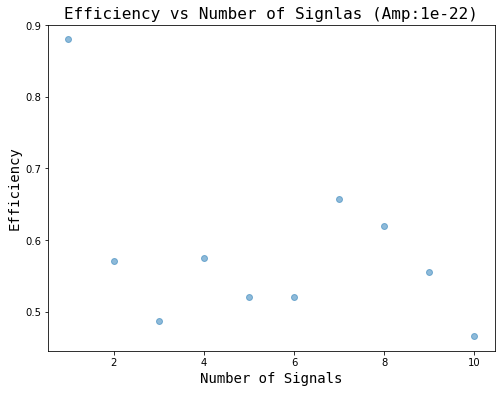

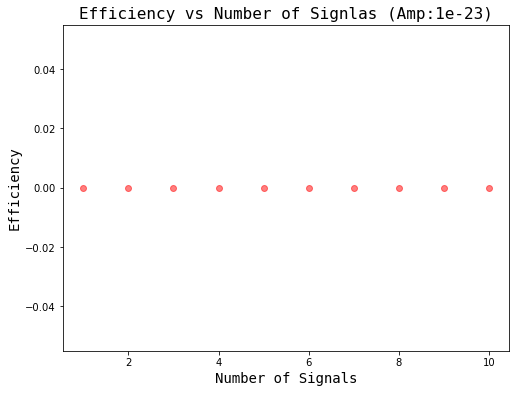

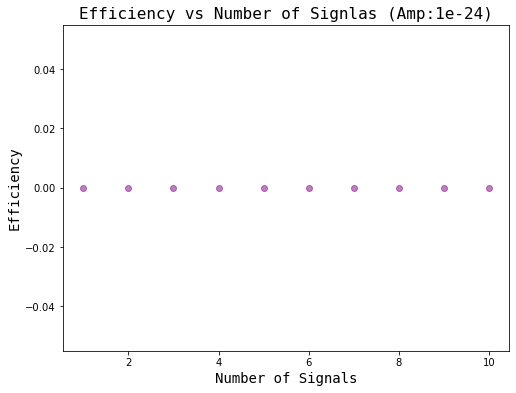

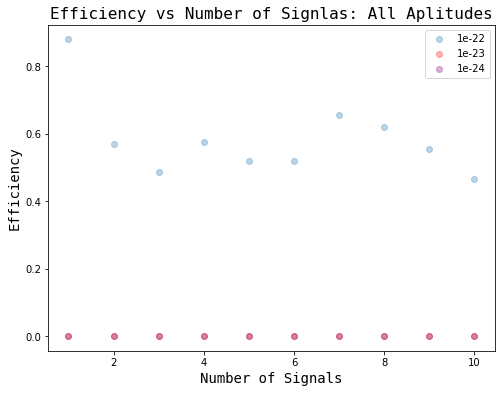

In [198]:
N=np.arange(1,11)

plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E1,alpha=.5)
plt.title('Efficiency vs Number of Signlas (Amp:1e-22)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)


plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E2,alpha=.5,color="r")
plt.title('Efficiency vs Number of Signlas (Amp:1e-23)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)

plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E3,alpha=.5,color="purple")
plt.title('Efficiency vs Number of Signlas (Amp:1e-24)',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)

plt.figure(facecolor="w",figsize=[8,6])
plt.scatter(N,E1,alpha=.3,label='1e-22')
plt.scatter(N,E2,alpha=.3,color="r",label='1e-23')
plt.scatter(N,E3,alpha=.3,color="purple",label='1e-24')
plt.title('Efficiency vs Number of Signlas: All Aplitudes',font='monospace',fontsize=16)
plt.xlabel("Number of Signals",font='monospace',fontsize=14)
plt.ylabel("Efficiency",font='monospace',fontsize=14)
plt.legend(loc='upper right')

In [106]:
 df1
#so for some reason the signal distanced were captured in a col called 'distaway' 
#instead of 'distaway_1', lets fix that

,N,Retireved_N,TFFT,dur,Cr,cm,minf,maxf,h0,distaway_1,...,distaway_6,distaway_7,distaway_8,distaway_9,f0_6,f0_7,f0_8,f0_9,distaway_10,f0_10
0,1.0,1.0,32.0,9853.0,2.473167,1.15,4.0,7.0,1.000000e-23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,32.0,9853.0,2.248333,1.15,4.0,7.0,1.000000e-23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,32.0,9853.0,2.698000,1.15,4.0,7.0,1.000000e-23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,32.0,9853.0,3.541125,1.15,4.0,7.0,1.000000e-23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,32.0,9853.0,5.058750,1.15,4.0,7.0,1.000000e-23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,1.0,0.0,32.0,9853.0,2.023500,1.15,4.0,7.0,1.000000e-24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,1.0,1.0,32.0,9853.0,1.349000,1.15,4.0,7.0,1.000000e-24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,1.0,1.0,32.0,9853.0,1.124167,1.15,4.0,7.0,1.000000e-24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,1.0,0.0,32.0,9853.0,2.922833,1.15,4.0,7.0,1.000000e-24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
#this works here but we need to do this at the begining of the analysis for future dfs
temp=np.array(df1['distaway'])
df1['distaway_1']=temp
df1
df1.drop(['distaway'],axis=1)

,N,Retireved_N,TFFT,dur,Cr,cm,minf,maxf,h0,distaway_1,...,distaway_6,distaway_7,distaway_8,distaway_9,f0_6,f0_7,f0_8,f0_9,distaway_10,f0_10
0,1.0,1.0,32.0,9853.0,2.473167,1.15,4.0,7.0,1.000000e-23,2.405954,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,32.0,9853.0,2.248333,1.15,4.0,7.0,1.000000e-23,1.075429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,32.0,9853.0,2.698000,1.15,4.0,7.0,1.000000e-23,2.405954,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,32.0,9853.0,3.541125,1.15,4.0,7.0,1.000000e-23,2.587814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,32.0,9853.0,5.058750,1.15,4.0,7.0,1.000000e-23,1.075429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,1.0,0.0,32.0,9853.0,2.023500,1.15,4.0,7.0,1.000000e-24,6.827321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,1.0,1.0,32.0,9853.0,1.349000,1.15,4.0,7.0,1.000000e-24,0.995887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,1.0,1.0,32.0,9853.0,1.124167,1.15,4.0,7.0,1.000000e-24,2.650716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,1.0,0.0,32.0,9853.0,2.922833,1.15,4.0,7.0,1.000000e-24,6.642096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
df

,N,Retireved_N,TFFT,dur,Cr,cm,minf,maxf,h0,distaway_1,...,distaway_6,distaway_7,distaway_8,distaway_9,f0_6,f0_7,f0_8,f0_9,distaway_10,f0_10
0,4,1,32,9853,1.686250,1.15,4,7,1.000000e-24,4.470225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,3,32,9853,1.349000,1.15,4,7,1.000000e-24,1.827960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,1,32,9853,1.686250,1.15,4,7,1.000000e-24,1.235559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,32,9853,6.745000,1.15,4,7,1.000000e-24,4.194978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,32,9853,2.023500,1.15,4,7,1.000000e-24,5.573912,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,7,6,32,9853,2.563100,1.15,4,7,1.000000e-22,0.545294,...,4.278496,2.073472,NaN,NaN,6.123642,6.581723,NaN,NaN,NaN,NaN
46,7,3,32,9853,1.349000,1.15,4,7,1.000000e-22,3.162963,...,7.254025,3.155258,NaN,NaN,6.284142,6.632288,NaN,NaN,NaN,NaN
47,7,4,32,9853,1.927143,1.15,4,7,1.000000e-22,6.382540,...,4.160386,1.142818,NaN,NaN,6.142889,6.581723,NaN,NaN,NaN,NaN
48,7,6,32,9853,2.698000,1.15,4,7,1.000000e-22,0.545294,...,5.349235,1.005196,NaN,NaN,6.242570,6.581723,NaN,NaN,NaN,NaN
